In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from importlib import reload
import sys,os

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print("x_train : ",x_train.shape)
print("y_train : ",y_train.shape)
print("x_test  : ",x_test.shape)
print("y_test  : ",y_test.shape)

x_train :  (60000, 28, 28)
y_train :  (60000,)
x_test  :  (10000, 28, 28)
y_test  :  (10000,)


In [3]:
x_train = x_train.reshape(-1,28,28,1)
x_test  = x_test.reshape(-1,28,28,1)

print("x_train : ",x_train.shape)
print("y_train : ",y_train.shape)
print("x_test  : ",x_test.shape)
print("y_test  : ",y_test.shape)

x_train :  (60000, 28, 28, 1)
y_train :  (60000,)
x_test  :  (10000, 28, 28, 1)
y_test  :  (10000,)


In [4]:
print(y_train[0])

5


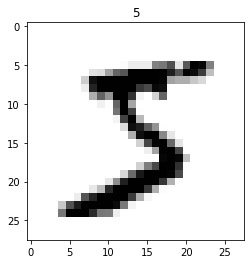

In [5]:
plt.imshow(x_train[0],cmap='binary')
plt.title(y_train[0])
plt.show()

In [6]:
print('Before normalization : Min={}, max={}'.format(x_train.min(),x_train.max()))

xmax=x_train.max()
x_train = x_train / xmax
x_test  = x_test  / xmax

print('After normalization  : Min={}, max={}'.format(x_train.min(),x_train.max()))

Before normalization : Min=0, max=255
After normalization  : Min=0.0, max=1.0


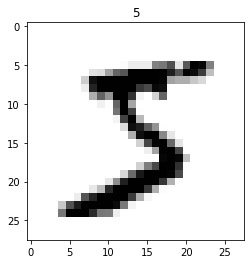

In [7]:
plt.imshow(x_train[0],cmap='binary')
plt.title(y_train[0])
plt.show()

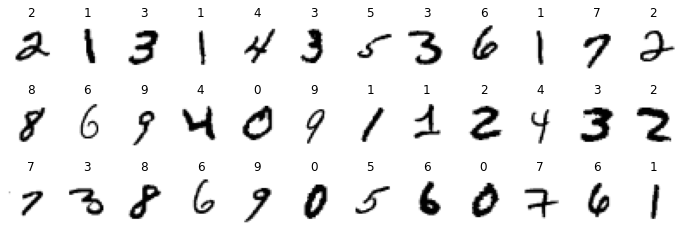

In [8]:
fig=plt.figure(figsize=(12, 4))
columns = 12
rows = 3
for i in range(1, columns*rows +1):
    
    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.imshow(x_train[i+4],cmap='binary')
    plt.title(y_train[i+4])
plt.show()

In [9]:
hidden1     = 50
hidden2     = 150

model = keras.Sequential([
    keras.layers.Input((28,28)),
    keras.layers.Flatten(),
    keras.layers.Dense( hidden1, activation='relu'),
    keras.layers.Dense( hidden2, activation='relu'),
    keras.layers.Dense( 10,      activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 50)                39250     
                                                                 
 dense_1 (Dense)             (None, 150)               7650      
                                                                 
 dense_2 (Dense)             (None, 10)                1510      
                                                                 
Total params: 48,410
Trainable params: 48,410
Non-trainable params: 0
_________________________________________________________________


In [11]:
batch_size  = 512
epochs      =  16

history = model.fit(  x_train, y_train,
                      batch_size      = batch_size,
                      epochs          = epochs,
                      verbose         = 1,
                      validation_data = (x_test, y_test))

Epoch 1/16
118/118 [==============================] - 1s 6ms/step - loss: 0.6642 - accuracy: 0.8282 - val_loss: 0.2747 - val_accuracy: 0.9219
Epoch 2/16
118/118 [==============================] - 1s 4ms/step - loss: 0.2444 - accuracy: 0.9301 - val_loss: 0.2112 - val_accuracy: 0.9364
Epoch 3/16
118/118 [==============================] - 1s 4ms/step - loss: 0.1905 - accuracy: 0.9452 - val_loss: 0.1719 - val_accuracy: 0.9465
Epoch 4/16
118/118 [==============================] - 0s 4ms/step - loss: 0.1592 - accuracy: 0.9539 - val_loss: 0.1532 - val_accuracy: 0.9544
Epoch 5/16
118/118 [==============================] - 0s 4ms/step - loss: 0.1371 - accuracy: 0.9592 - val_loss: 0.1366 - val_accuracy: 0.9593
Epoch 6/16
118/118 [==============================] - 0s 4ms/step - loss: 0.1204 - accuracy: 0.9650 - val_loss: 0.1255 - val_accuracy: 0.9624
Epoch 7/16
118/118 [==============================] - 0s 4ms/step - loss: 0.1069 - accuracy: 0.9687 - val_loss: 0.1157 - val_accuracy: 0.9635
Epoch 

In [12]:
score = model.evaluate(x_test, y_test)

print('Test loss     :', score[0])
print('Test accuracy :', score[1])

313/313 [==============================] - 0s 876us/step - loss: 0.0855 - accuracy: 0.9737
Test loss     : 0.0854707807302475
Test accuracy : 0.9736999869346619


In [13]:
df=pd.DataFrame(data=history.history)
display(df)


,loss,accuracy,val_loss,val_accuracy
0,0.664193,0.828217,0.274694,0.9219
1,0.244359,0.930150,0.211190,0.9364
2,0.190494,0.945167,0.171912,0.9465
3,0.159195,0.953883,0.153172,0.9544
4,0.137139,0.959150,0.136567,0.9593
5,0.120438,0.965033,0.125492,0.9624
6,0.106877,0.968700,0.115678,0.9635
7,0.096801,0.971583,0.111543,0.9638
8,0.086435,0.974750,0.109012,0.9665
9,0.078871,0.976983,0.102295,0.9658


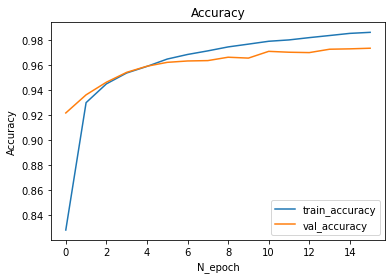

In [14]:
plt.figure()
plt.plot(df['accuracy'],label='train_accuracy')
plt.plot(df['val_accuracy'],label='val_accuracy')
plt.title("Accuracy")
plt.xlabel('N_epoch')
plt.ylabel('Accuracy')
plt.legend()


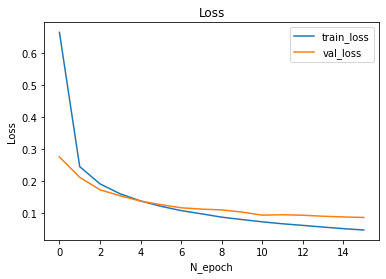

In [15]:
plt.figure()
plt.plot(df['loss'],label='train_loss')
plt.plot(df['val_loss'],label='val_loss')
plt.title("Loss")
plt.xlabel('N_epoch')
plt.ylabel('Loss')
plt.legend()


In [16]:
y_sigmoid = model.predict(x_test)
y_pred    = np.argmax(y_sigmoid, axis=-1)

In [17]:
y_sigmoid[0]


array([6.02851969e-07, 1.18007071e-09, 1.70138555e-05, 1.72712505e-04,
       3.10815884e-09, 9.48738972e-08, 7.28535179e-13, 9.99795973e-01,
       1.32402295e-06, 1.23192685e-05], dtype=float32)

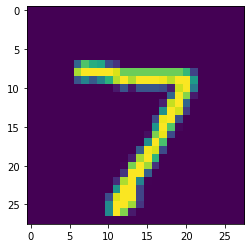

In [18]:
plt.imshow(x_test[0])

In [19]:
y_pred[0]

7

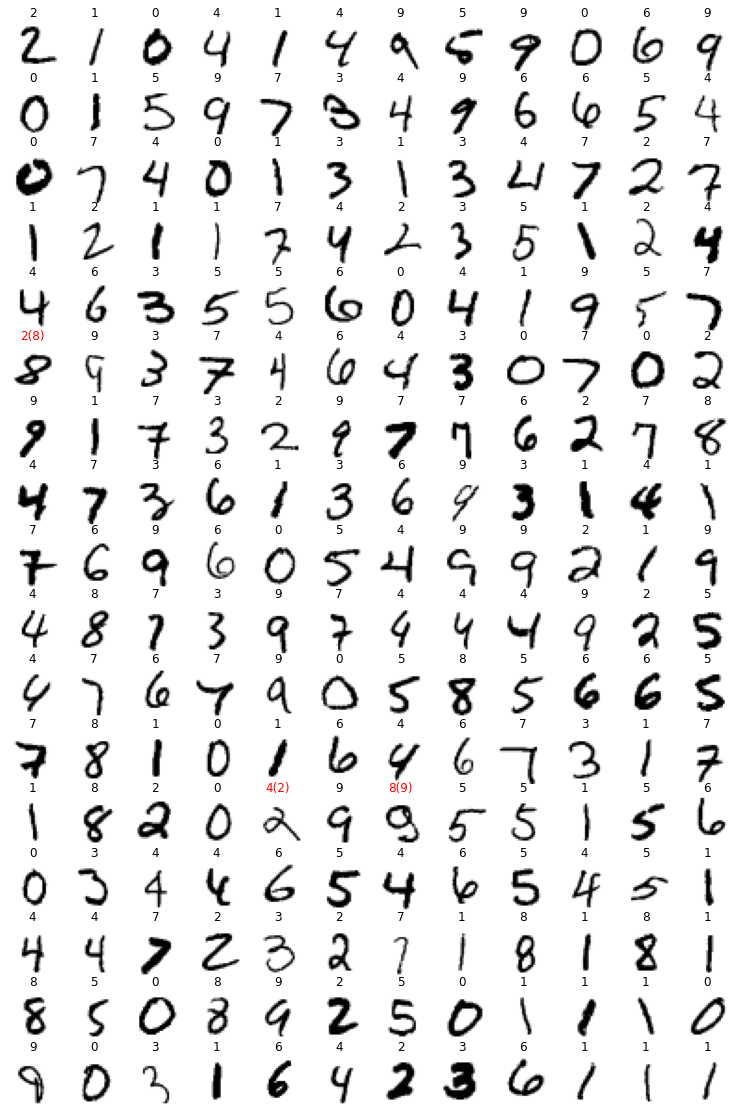

In [26]:
fig=plt.figure(figsize=(13, 20))
columns = 12
rows = 17
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.imshow(x_test[i],cmap='binary')
    if y_pred[i]==y_test[i]:
        plt.title(y_test[i])
    else:
        plt.title(f'{y_pred[i]}({y_test[i]})', color='r') 
plt.show()

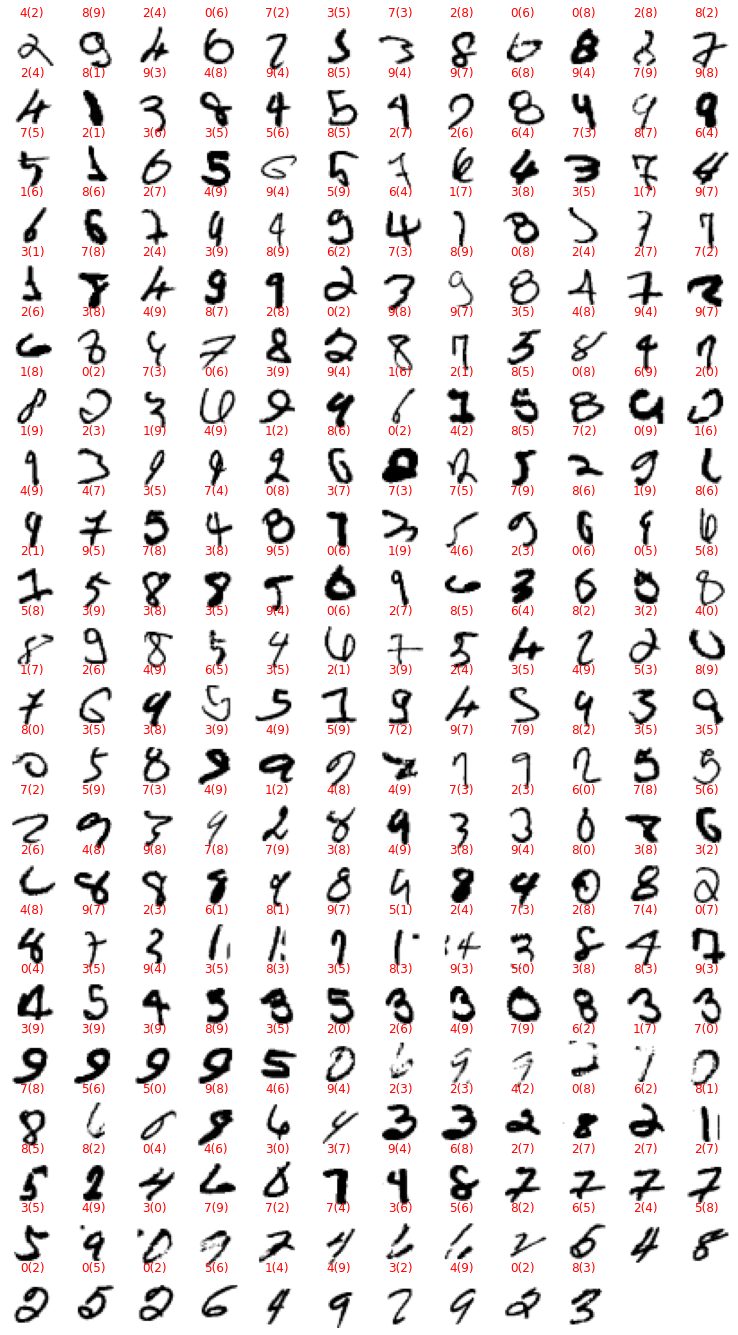

In [28]:
errors=[ i for i in range(len(x_test)) if y_pred[i]!=y_test[i] ]
fig=plt.figure(figsize=(13, 24))
columns = 12
rows = int(len(errors)/12)+1
for i in range(1, len(errors)):
    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.imshow(x_test[errors[i]],cmap='binary')
    plt.title(f'{y_pred[errors[i]]}({y_test[errors[i]]})', color='r') 
plt.show()

In [22]:
from sklearn.metrics import  confusion_matrix

In [23]:
confusion_matrix(y_test,y_pred)

array([[ 969,    0,    2,    2,    1,    2,    1,    1,    2,    0],
       [   0, 1125,    4,    1,    0,    1,    1,    0,    3,    0],
       [   6,    2, 1004,    3,    3,    0,    3,    6,    5,    0],
       [   0,    0,    6,  988,    0,    1,    0,    8,    4,    3],
       [   2,    1,    7,    0,  954,    0,    4,    3,    0,   11],
       [   2,    0,    0,   16,    0,  862,    2,    2,    6,    2],
       [   6,    3,    5,    2,    3,    5,  930,    0,    4,    0],
       [   1,    4,    8,    2,    1,    0,    0, 1003,    2,    7],
       [   5,    1,    5,    9,    5,    3,    2,    5,  935,    4],
       [   1,    4,    0,    8,   14,    3,    1,    6,    5,  967]],
      dtype=int64)

<AxesSubplot:>

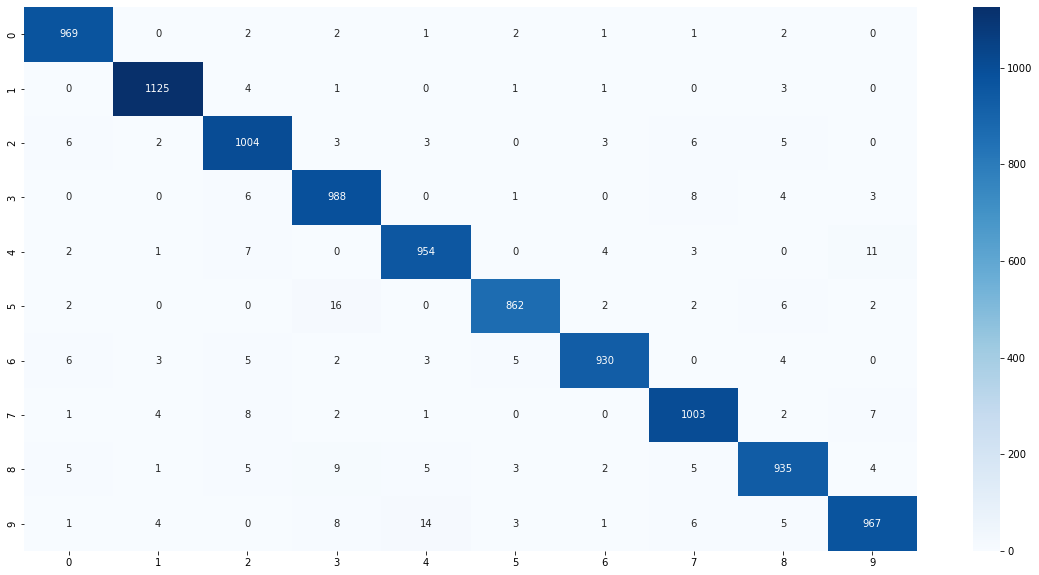

In [24]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True,fmt='1', cmap='Blues')